__1)__ Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X = zp
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y = ks
n = len(zp) # = 10
b = (np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)
b # ~ 2.620538882402765 for model with intercept

2.620538882402765

In [2]:
a = np.mean(y)-b*np.mean(X)
a # ~ 444.1773573243596 intercept

444.1773573243596

In [3]:
r = b * np.std(X) / np.std(y)
r # ~ 0.8874900920739162 for model with intercept

0.8874900920739162

In [4]:
R2 = r**2
R2 # ~ 0.7876386635293682 for model with intercept

0.7876386635293682

In [5]:
y_hat = a+b*X
y_hat # with intercept

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [6]:
R2 = 1-(((y_hat-ks)**2).sum())/(((ks-np.mean(ks))**2).sum())
R2 # ~ 0.7876386635293686

0.7876386635293686

In [7]:
A_mean = 100 * np.mean(np.abs((y - y_hat) / y))
A_mean # ~ 11.46925184356171 for model with intercept

11.46925184356171

In [8]:
mse = ((y-y_hat)**2).sum()/n
mse # ~ 6470.414201176658 for model with intercept

6470.414201176658

<function matplotlib.pyplot.show(*args, **kw)>

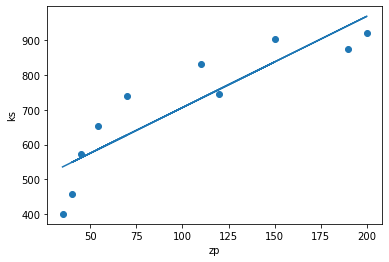

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)
plt.plot(X,a+b*X)
plt.xlabel('zp')
plt.ylabel('ks')
plt.show

In [10]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

In [11]:
import seaborn as sns
X = X.reshape(10,1)
#X = np.hstack([np.ones((10,1)),X])
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
y = y.reshape(10,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
b = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
b # ~ 5.88982042

array([[5.88982042]])

In [14]:
y_hat_no_a = b*zp
y_hat_no_a # without intercept

array([[ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
         235.59281681,  412.28742941,  318.05030269,  883.47306302,
         706.77845042,  647.88024621]])

In [15]:
r = b * np.std(zp) / np.std(ks)
r # ~ 1.99468793 > 1 ???? 

array([[1.99468793]])

In [16]:
R2 = r**2
R2 # ~ 3.97877992 > 1 ???? 

array([[3.97877992]])

In [17]:
R2 = (((y_hat_no_a-ks)**2).sum())/(((ks-np.mean(ks))**2).sum()+(((y_hat_no_a-ks)**2).sum()))
R2 # ~ 0.6497254946363845 ?????

0.6497254946363845

In [18]:
from math import sqrt
r = sqrt(R2)
r # ~ 0.8060555158525897 ??????

0.8060555158525897

In [19]:
A_mean = 100 * np.mean(np.abs((ks - y_hat_no_a) / ks))
A_mean # ~ 33.225451661167305 for model without intercept

33.225451661167305

In [20]:
mse = ((ks-y_hat_no_a)**2).sum()/n
mse # ~ 56516.8584157194 for model without intercept

56516.8584157194

<function matplotlib.pyplot.show(*args, **kw)>

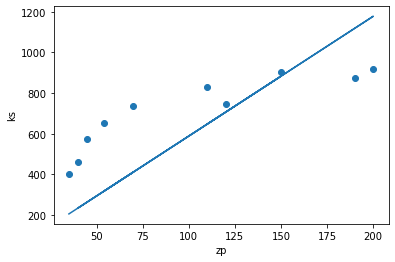

In [21]:
plt.scatter(X,y)
plt.plot(X,b*X)
plt.xlabel('zp')
plt.ylabel('ks')
plt.show

__2)__ Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [22]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X = zp
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y = ks
n = len(zp) # = 10

In [23]:
def mse_(B1,y=y,X=X,n=n):
    return np.sum((B1*X-y)**2)/n

In [24]:
alpha = 1e-6
alpha

1e-06

In [25]:
B1 = 0.1

In [26]:
count = 0
B_prev = 10
while count <= 3000 and abs(B_prev - B1) >= 0.0000001:
    B_prev = B1
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    count = count + 1
    if count%100 == 0:
        print('Iteration: {count}, B1={B1}, mse={mse}'.format(count=count, B1=B1, mse=mse_(B1)))
print('Iteration: {count}, B1={B1}, mse={mse}'.format(count=count, B1=B1, mse=mse_(B1)))
# Iteration: 513, B1=5.889816969911528, mse=56516.8584158834

Iteration: 100, B1=5.535619041013072, mse=58245.2515982716
Iteration: 200, B1=5.868151593145588, mse=56523.327053798086
Iteration: 300, B1=5.888494795528504, mse=56516.882625071215
Iteration: 400, B1=5.8897393229605965, mse=56516.85850632468
Iteration: 500, B1=5.889815458885515, mse=56516.858416058494
Iteration: 513, B1=5.889816969911528, mse=56516.8584158834


__*3__ Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [27]:
def mse_(B1,B0,y=y,X=X,n=n):
    return np.sum((B0+B1*X-y)**2)/n

In [28]:
B1 = 0.1
B0 = 0
count = 0
B_prev = 10
while count <= 5000 and abs(B_prev - B1) >= 0.00000000001:
    B_prev = B1
    B0 = np.mean(y)-B1*np.mean(X)
    B1 -= alpha*(2/n)*np.sum((B0+B1*X-y)*X)
    count = count + 1
    if count%500 == 0:
        print('Iteration: {count}, B1={B1}, B0={B0} mse={mse}'.format(count=count, B1=B1, B0=B0, mse=mse_(B1,B0)))
print('Iteration: {count}, B1={B1}, B0={B0} mse={mse}'.format(count=count, B1=B1, B0=B0, mse=mse_(B1,B0)))
# Iteration: 3037, B1=2.620538880988277, B0=444.1773574687982 mse=6470.414201176662

Iteration: 500, B1=2.544949314214166, B0=451.896087907977 mse=6490.384725593585
Iteration: 1000, B1=2.6182719930249307, B0=444.40883778905425 mse=6470.432162006379
Iteration: 1500, B1=2.620470899643051, B0=444.1842992955752 mse=6470.41421733004
Iteration: 2000, B1=2.6205368436373697, B0=444.1775655102401 mse=6470.414201191188
Iteration: 2500, B1=2.6205388212613188, B0=444.17736356773895 mse=6470.414201176673
Iteration: 3000, B1=2.620538880569169, B0=444.1773575115949 mse=6470.414201176659
Iteration: 3037, B1=2.620538880988277, B0=444.1773574687982 mse=6470.414201176662


In [44]:
alpha = 7e-5
alpha

7e-05

In [48]:
B1 = 0.1
B0 = 0
count = 0
B_prev = 10
B_prev_0 = 10
while count <= 500000 and abs(B_prev - B1) >= 0.00000000001 and abs(B_prev_0 - B0) >= 0.00000000001:
    B_prev = B1
    B_prev_0 = B0
    B0 -= alpha*(2/n)*np.sum((B0+B1*X-y))
    B1 -= alpha*(2/n)*np.sum((B0+B1*X-y)*X)
    count = count + 1
    if count%50000 == 0:
        print('Iteration: {count}, B1={B1}, B0={B0} mse={mse}'.format(count=count, B1=B1, B0=B0, mse=mse_(B1,B0)))
print('Iteration: {count}, B1={B1}, B0={B0} mse={mse}'.format(count=count, B1=B1, B0=B0, mse=mse_(B1,B0)))
# Iteration: 3037, B1=2.620538880988277, B0=444.1773574687982 mse=6470.414201176662

Iteration: 50000, B1=3.174136015346585, B0=368.962202571725 mse=7905.477645719419
Iteration: 100000, B1=2.714291724230331, B0=431.4395122617205 mse=6511.572016963726
Iteration: 150000, B1=2.636416123861725, B0=442.0201764028649 mse=6471.594612960403
Iteration: 200000, B1=2.6232277267239863, B0=443.8120341864832 mse=6470.448055547999
Iteration: 250000, B1=2.6209942438584775, B0=444.1154890806106 mse=6470.415172124656
Iteration: 300000, B1=2.6206159988255218, B0=444.16687980681763 mse=6470.414229023581
Iteration: 350000, B1=2.6205519422315624, B0=444.1755829346716 mse=6470.414201975313
Iteration: 400000, B1=2.620541094112316, B0=444.1770568277235 mse=6470.414201199562
Iteration: 450000, B1=2.6205392569604267, B0=444.1773064346226 mse=6470.4142011773165
Iteration: 458037, B1=2.620539163952054, B0=444.1773190713195 mse=6470.414201177029
